# [ DATA COLLECTION AND PROCESSING ]

# 1 | Preparing the data frame.

## 1.1 | Hate Speech Filipino Dataset (source 1).

### Load the dataset.

In [1]:
# Hate Speech in Filipino: Contains 10k tweets (training set) that are labeled as hate speech
# or non-hate speech. It also comes with 4,232 validation and 10k testing samples.
# Collected during the 2016 Philippine Presidential Elections.
#
# Load the datasets from the local csv files.
# Datasets are from Hugging Face (ref: https://huggingface.co/datasets/hate_speech_filipino)
#
# Dataset Columns
# - text (String) : The input text (i.e., tweet).
# - label (int) : 0 means 'non-hate speech' while 1 means 'hate speech.'

import pandas as pd

local_sub_path = 'datasets/Hate Speech Filipino/'

hate_speech_fil_train_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_train.csv')
hate_speech_fil_test_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_train.csv')
hate_speech_fil_validate_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_validate.csv')

# Combine all the datasets into a single data frame.
hate_speech_fil_df = pd.concat([hate_speech_fil_test_df, hate_speech_fil_train_df, hate_speech_fil_validate_df])

# Reset the index of hate_speech_fil_df.
hate_speech_fil_df.reset_index(drop=True, inplace=True)

### Inspect the dataset.

In [2]:
hate_speech_fil_train_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [3]:
hate_speech_fil_test_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [4]:
hate_speech_fil_validate_df

,text,label
0,Escudero denies betraying Poe after meeting wi...,0
1,Hndi ko makita yung sa one more chance saka ka...,1
2,Mar Roxas is now addressing the crowd gathered...,0
3,@ImYourBaeMax perfect! Para makaharap ni Duter...,0
4,#OnlyBinayPriority4Ps Wag nating hayaan na mal...,0
...,...,...
4227,Walang katumbas na halaga ng pera ang BOTO at ...,0
4228,Mar Roxas says presidential race is now only b...,0
4229,Ms Miriam to withdraw presidency to give away ...,0
4230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [5]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
24227,Walang katumbas na halaga ng pera ang BOTO at ...,0
24228,Mar Roxas says presidential race is now only b...,0
24229,Ms Miriam to withdraw presidency to give away ...,0
24230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [6]:
# Check the basic information of the data frame.
hate_speech_fil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24232 entries, 0 to 24231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    24232 non-null  object
 1   label   24232 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 378.8+ KB


### Clean the dataset.

In [7]:
# Check for null values.
hate_speech_fil_df.isnull().sum()

text     0
label    0
dtype: int64

It is important to remove the duplicate entries, since they might potentially skew the results/model later on.

In [8]:
# Check for duplicates.
hate_speech_fil_df.duplicated().sum()

10356

In [9]:
# Show the duplicates.
hate_speech_fil_df[hate_speech_fil_df.duplicated()]


,text,label
452,#NogNogHambog,1
481,#OnlyBinayInMakatiSanKaPa,0
543,#OnlyBinayInMakatiSanKaPa,0
576,#OnlyBinayInMakatiSanKaPa,0
598,#OnlyBinayUNAsaIlocos,0
...,...,...
24013,#OnlyBinayUNAsaIlocos,0
24029,#onlybinay,0
24042,#PHvote,0
24158,#PiliPinasDebates2016,1


In [10]:
# Drop the duplicates.
hate_speech_fil_df.drop_duplicates(inplace=True)

# Reset the index.
hate_speech_fil_df.reset_index(drop=True, inplace=True)

In [11]:
# Verify that there are no duplicates.
hate_speech_fil_df.duplicated().sum()

0

In [12]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
13871,Walang katumbas na halaga ng pera ang BOTO at ...,0
13872,Mar Roxas says presidential race is now only b...,0
13873,Ms Miriam to withdraw presidency to give away ...,0
13874,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


## 1.2 | Toxic Tweets Dataset (source 2).

### Load the dataset.

In [13]:
# Toxic Tweets Dataset
# A balanced dataset of tweets containing hate speech and offensive language.
#
# Load the dataset from the local csv file.
# Dataset is from Kaggle (ref: https://www.kaggle.com/datasets/ashwiniyer176/toxic-tweets-dataset)
#
# Dataset Columns
# - tweet (String) : The input text (i.e., tweet).
# - Toxicity (int) : Label indicating whether a tweet is toxic(1) or not(0).

local_sub_path = 'datasets/Toxic Tweets/'

raw_toxic_tweets_df = pd.read_csv(local_sub_path + 'FinalBalancedDataset.csv')

### Inspect the dataset.

In [14]:
raw_toxic_tweets_df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [15]:
# Check the basic information of the data frame.
raw_toxic_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


### Clean the dataset.

In [16]:
# Check for null values.
raw_toxic_tweets_df.isnull().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [17]:
# Check for duplicates.
raw_toxic_tweets_df.duplicated().sum()

0

### Restructure the data frame.

In [18]:
# The data frame should have only a text and label features.

toxic_tweets_df = raw_toxic_tweets_df.copy()
toxic_tweets_df.rename(columns={'tweet': 'text', 'Toxicity': 'label'}, inplace=True)
toxic_tweets_df = toxic_tweets_df[['text', 'label']]

toxic_tweets_df

,text,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
56741,"you've gone and broke the wrong heart baby, an...",1
56742,young buck wanna eat!!.. dat nigguh like I ain...,1
56743,youu got wild bitches tellin you lies,1


### Clean the dataset again.

In [19]:
# Check for duplicates.
toxic_tweets_df.duplicated().sum()

2432

In [20]:
# Show the duplicates.
toxic_tweets_df[toxic_tweets_df.duplicated()]

,text,label
46,#model i love u take with u all the time in ...,0
96,#model i love u take with u all the time in ...,0
117,#model i love u take with u all the time in ...,0
162,#model i love u take with u all the time in ...,0
218,#model i love u take with u all the time in ...,0
...,...,...
31886,100 amazing health benefits of cucumbers! #...,0
31904,#model i love u take with u all the time in ...,0
31930,@user #feminismiscancer #feminismisterrorism #...,1
31951,i've just posted a new blog: #secondlife #lone...,0


In [21]:
# Drop the duplicates.
toxic_tweets_df.drop_duplicates(inplace=True)

# Reset the index.
toxic_tweets_df.reset_index(drop=True, inplace=True)

toxic_tweets_df

,text,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
54308,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
54309,"you've gone and broke the wrong heart baby, an...",1
54310,young buck wanna eat!!.. dat nigguh like I ain...,1
54311,youu got wild bitches tellin you lies,1


In [22]:
# Verify that there are no duplicates.
toxic_tweets_df.duplicated().sum()

0

## 1.3 | Hate Speech and Offensive Language Dataset (source 3)

### Load the dataset.

In [23]:
# Dataset using Twitter data. The text is classified as: hate-speech, offensive language, and neither.
# This dataset contains text that can be considered racist, sexist, homophobic, or generally offensive.
#
# Load the dataset from the local csv file.
# Dataset is from Kaggle (ref: https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset)
# 
# Dataset Columns
# - counts (int) : Number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).
# - hate_speeches (int) : Number of CF users who judged the tweet to be hate speech.
# - offensive_languages (int) : Number of CF users who judged the tweet to be offensive.
# - neither (int) : Number of CF users who judged the tweet to be neither offensive nor non-offensive.
# - class (int) : Class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither.
# - tweet (String) : Text tweet.
#
# Note: For simplicity sake, we will be only using the 'tweet' and 'class' columns. They are more than enough for this context.

local_sub_path = 'datasets/Hate Speech and Offensive Language/'

raw_hs_and_offensive_lang_df = pd.read_csv(local_sub_path + 'labeled_data.csv')

### Inspect the dataset.

In [24]:
raw_hs_and_offensive_lang_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [25]:
# Check the basic information of the data frame.
raw_hs_and_offensive_lang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


### Clean the dataset.

In [26]:
# Check for null values.
raw_hs_and_offensive_lang_df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [27]:
# Check for duplicates.
raw_hs_and_offensive_lang_df.duplicated().sum()

0

### Restructure the data frame.

In [28]:
# The data frame should have only a text and label features.

hs_and_offensive_lang_df = raw_hs_and_offensive_lang_df.copy()
hs_and_offensive_lang_df = hs_and_offensive_lang_df[['tweet', 'class']]
hs_and_offensive_lang_df.rename(columns={'tweet': 'text', 'class': 'label'}, inplace=True)

# The original labels are 0, 1, and 2. They each means 'hate speech', 'offensive language', and 'neither' respectively.
# The original labels 0 and 1 will be mapped to 1 (means toxic) and 2 will be mapped to 0 (means non-toxic)
mapping = {0: 1, 1: 1, 2: 0}
hs_and_offensive_lang_df['label'] = hs_and_offensive_lang_df['label'].map(mapping)

hs_and_offensive_lang_df


,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",0
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


### Clean the dataset again.

In [29]:
# Check for duplicates.
hs_and_offensive_lang_df.duplicated().sum()

0

## 1.4 | Combine the different data frames.

In [30]:
# Make a single data frame for all the datasets.
df = pd.concat([hate_speech_fil_df, toxic_tweets_df, hs_and_offensive_lang_df], ignore_index=True)

df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
92967,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
92968,"you've gone and broke the wrong heart baby, an...",0
92969,young buck wanna eat!!.. dat nigguh like I ain...,1
92970,youu got wild bitches tellin you lies,1


### Clean the data.

After countless experiments, removing the substrings that starts with @, http, and, https reduces the accuracy rate on sufficiently large data sets. For now, we will comment this subsequent code out.

Adding more to this, we initially thought that urls and twitter handler names would be useless in classifiying the text since they just 'bloat' the extracted tokens by the CountVectorizer. But we were wrong, the total model accuracy would decrease by 2% to 3% if we remove these said substrings. Our hypothesis is that these subtrings adds more 'context' in classifying the text. For instance, people with '@deeznuts' or any other 'toxic' twitter handler names are more likely to tweet toxic speeches.

In [31]:
# # Remove the substrings that starts with @, http, and https.
# # They are irrelevant to the classification.

# import re

# for index, row in df.iterrows():
#     df.loc[index, 'text'] = re.sub(r'@\S+', '', df.loc[index, 'text'])
#     df.loc[index, 'text'] = re.sub(r'http\S+', '', df.loc[index, 'text'])
#     df.loc[index, 'text'] = re.sub(r'https\S+', '', df.loc[index, 'text'])

# df

In [32]:
# Check for duplicates.
df.duplicated().sum()

23492

In [33]:
# Show the duplicates.
df[df.duplicated()]

,text,label
68189,!!! RT @mayasolovely: As a woman you shouldn't...,0
68190,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
68191,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
68192,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
68193,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
92966,you're such a retard i hope you get type 2 dia...,1
92967,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
92969,young buck wanna eat!!.. dat nigguh like I ain...,1
92970,youu got wild bitches tellin you lies,1


In [34]:
# Drop the duplicates.
df.drop_duplicates(inplace=True)

# Reset the index.
df.reset_index(drop=True, inplace=True)

df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
69475,when baylor wins im talking so much trash,0
69476,who's downie like a brownie 4 brunch? Need mim...,0
69477,yea so about @N_tel 's new friend.. all my fri...,0
69478,"you know what they say, the early bird gets th...",0


In [35]:
# Verify that there are no duplicates.
df.duplicated().sum()

0

In [36]:
# Check for texts that only contain number strings.
df[df['text'].str.isnumeric()]

,text,label


The code snippets below are meant to remove the 'empty' and irrelevant rows after removing those specified substrings above (e.g., handler names, urls, etc.) since there are rows in the original dataset that only contains handler names, urls, and the like. We decided to not delete these code snippets just yet even if they don't explicitly do anything useful (for future reference or change of mind in the data cleaning procedures).

In [37]:
# Check for empty strings.
df[df['text'] == '']

,text,label


In [38]:
# Remove the rows with empty strings.
df.drop(df[df['text'] == ''].index, inplace=True)

# Reset the index.
df.reset_index(drop=True, inplace=True)

df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
69475,when baylor wins im talking so much trash,0
69476,who's downie like a brownie 4 brunch? Need mim...,0
69477,yea so about @N_tel 's new friend.. all my fri...,0
69478,"you know what they say, the early bird gets th...",0


In [39]:
# Verify that there are no empty strings.
df[df['text'] == '']

,text,label


# [ AI MODEL ]

## Creating a Train and Test sets

In [40]:
X = df['text']
y = df['label']

print(X.shape)
print(y.shape)

(69480,)
(69480,)


In [41]:
# Split X and y into training and testing sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(52110,)
(17370,)
(52110,)
(17370,)


## Vectorizing the dataset (w/o optimized params).

In [42]:
# Instantiate the CountVectorizer.

from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()

In [43]:
# Learn the training data vocabulary, then use it to create a document-term matrix.

cvect.fit(X_train)

CountVectorizer()

In [44]:
# Examine the fitted vocabulary.

feature_names = cvect.get_feature_names_out()
print(feature_names)
print('len:', len(feature_names))
pd.DataFrame(feature_names)


['00' '000' '0000000000000' ... 'ð¾ñ' 'ó¾' 'ø¹ù']
len: 69692


,0
0,00
1,000
2,0000000000000
3,000001
4,002
...,...
69687,ð¾ð½ð
69688,ð¾ð½ðµð
69689,ð¾ñ
69690,ó¾


There are a lot of extracted unique tokens. This would mean a larger runtime in fitting the model later on.

In [45]:
# Transform the training data into a document-term matrix.

# X_train_dtm = vect.transform(X_train)
X_train_dtm = cvect.fit_transform(X_train)

In [46]:
# Examine the document-term matrix.

X_train_dtm

<52110x69692 sparse matrix of type '<class 'numpy.int64'>'
	with 653595 stored elements in Compressed Sparse Row format>

Converting it to a dtm is really useful. We have found out that if we did not do this, we will need approximately 45+GB memory in building the AI model.

In [47]:
# Transform the testing data (using fitted vocabulary) into a document-term matrix.

X_test_dtm = cvect.transform(X_test)
X_test_dtm

<17370x69692 sparse matrix of type '<class 'numpy.int64'>'
	with 202486 stored elements in Compressed Sparse Row format>

# 2 | Building and Evaluating the MNB model

We chose Monomial Naive Bayes classifier because it can be effective in classifying toxic speeches for several reasons:

1. **Simplicity and efficiency:** Monomial Naive Bayes classifiers are relatively simple and computationally efficient. They are based on the assumption of feature independence, which means they treat each feature (word) in isolation, disregarding any relationships or dependencies between them. This assumption allows for faster training and classification compared to more complex models.

2. **Bag-of-words representation:** Monomial Naive Bayes classifiers commonly use a bag-of-words representation, where the order of words is disregarded and only the occurrence or frequency of each word is considered. This approach is suitable for toxic speech classification because toxic speeches often contain specific keywords or phrases that can be indicative of their toxicity. By focusing on individual words, the classifier can capture these patterns effectively.

3. **Text categorization:** Naive Bayes classifiers are particularly well-suited for text categorization tasks like toxic speech classification. They calculate the probability of a given speech belonging to a particular class (e.g., toxic or non-toxic) based on the occurrence of words in the speech. This makes them effective in identifying toxic patterns by analyzing the presence or absence of specific words associated with toxic speech.

4. **Reasonable performance:** Despite their simplicity, Naive Bayes classifiers have shown good performance in various text classification tasks, including toxic speech detection. They can achieve reasonably high accuracy when trained on appropriately labeled data. Moreover, they can handle large feature spaces (vocabulary size) efficiently, making them suitable for tasks involving a wide range of words.

It's worth noting that while Monomial Naive Bayes classifiers can be effective in toxic speech classification, they have limitations. For example, they assume independence between features, which may not always hold in the context of language. Although, we can use a trick to let this model 'understand' the context of specific substrings by increasing the n-gram param value. Additionally, they may struggle with capturing more complex linguistic structures or context beyond individual words. Nonetheless, with proper feature engineering and training data, they can be a valuable tool in identifying toxic speeches.

## Building the MNB model (w/o optimized params).

In [48]:
# Import and instantiate a Multinomial Naive Bayes model.

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [49]:
# Train the model using X_train_dtm and the fit() method.

mnb.fit(X_train_dtm, y_train)

MultinomialNB()

## Evaluating the MNB model (baseline performance).

In [50]:
# Make class predictions for the X_test_dtm. Store it in the y_pred_class variable.

y_pred_class = mnb.predict(X_test_dtm)

In [51]:
# Calculate the accuracy of the predictions.

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.8637881404720783

array([[8391, 1409],
       [ 957, 6613]], dtype=int64)

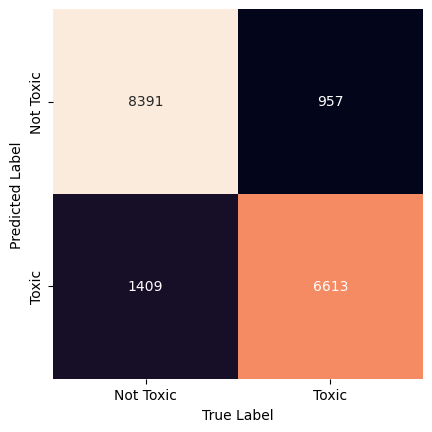

In [52]:
# Print the confusion matrix.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

metrics.confusion_matrix(y_test, y_pred_class)

In [53]:
# Print the classification report.

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      9800
           1       0.82      0.87      0.85      7570

    accuracy                           0.86     17370
   macro avg       0.86      0.86      0.86     17370
weighted avg       0.87      0.86      0.86     17370



In [54]:
# Show the predicted probabilities for the X_test_dtm.

y_pred_prob = mnb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([9.99969555e-01, 9.99999783e-01, 9.99999990e-01, ...,
       8.30752541e-01, 3.98301173e-07, 4.51200757e-04])

In [55]:
# Build a data frame with the input text, actual class, predicted class, and the predicted probabilities.

test_results_df = pd.DataFrame({'text': X_test, 'actual': y_test, 'predicted': y_pred_class, 'prob': y_pred_prob})
test_results_df


,text,actual,predicted,prob
5488,Di ako makapaniwala na pangalawa si Mar Roxas ...,1,1,9.999696e-01
50853,A lot of you niggas turned these bitches into ...,1,1,9.999998e-01
61636,RT @ZitlalyL: @Vic_Manzan0 just like you&#1280...,1,1,1.000000e+00
35506,our playground for the morning. big bear tri ...,0,0,4.488642e-03
2918,"""@ellisluciano: Binay as President #ShortHorro...",1,1,5.873902e-01
...,...,...,...,...
56103,Mad respect to Affleck for refusing to wear a ...,0,0,3.120894e-02
60913,RT @TAXSTONE: If YA bitch ex is a nigga u thin...,1,1,1.000000e+00
4524,@imcessfederico trillion yan ! Wala eh... Only...,0,1,8.307525e-01
16801,fathersdaymessage #fathers #day #message buy...,0,0,3.983012e-07


# 3 | Hypertuning the parameters.

Since our dataset also contains Filipino and TagLish entries, we decided to make a custom stopwords list that include these languages.

## Making a custom stop words.

In [56]:
# Making a custom stop words list that includes the Filipino language.

# Built-in English stop words.
english_stop_words = CountVectorizer(stop_words='english').get_stop_words()

# Generated by ChatGPT.
filipino_stop_words1 = [
    "ako", "akin", "ako'y", "amin", "aming", "ang", "ano", "anuman", "apat", "at", "atin", "ating",
    "ay", "bababa", "bago", "bakit", "bawat", "bilang", "dahil", "dalawa", "dapat", "din", "dito", "doon",
    "gagawin", "gayunman", "ginagawa", "ginawa", "ginawang", "gumawa", "gusto", "habang", "hanggang", "hindi", "huwag", "iba",
    "ibaba", "ibabaw", "ibig", "ikaw", "ilagay", "ilalim", "ilan", "inyong", "isa", "isang", "ito", "iyo",
    "iyon", "iyong", "ka", "kahit", "kailangan", "kailanman", "kami", "kanila", "kanilang", "kanino", "kanya", "kanyang",
    "kapag", "kapwa", "karamihan", "katiyakan", "katulad", "kay", "kaya", "kaysa", "ko", "kung", "laban",
    "lahat", "lamang", "likod", "lima", "maaari", "maaaring", "maging", "mahusay", "makita", "marami", "marapat", "mga",
    "minsan", "mismo", "mula", "muli", "na", "nabanggit", "naging", "nagkaroon", "nais", "nakita", "namin", "napaka",
    "narito", "nasaan", "ng", "nga", "ngayon", "ni", "nila", "nilang", "nito", "niya", "niyang", "noon",
    "o", "pag", "pala", "para", "pati", "pero", "pumunta", "pumupunta", "sa", "saan", "sabi", "sabihin",
    "sarili", "si", "sila", "sino", "siya", "tatlo", "tayo", "tulad", "tungkol", "una", "walang"
]

# From an open-source GitHub repo (ref: https://github.com/stopwords-iso/stopwords-tl).
filipino_stop_words2 = [
    'ako', 'sa', 'akin', 'ko', 'aking', 'sarili', 'kami', 'atin', 'ang', 'aming', 'amin', 'ating',
    'ka', 'iyong', 'iyo', 'inyong', 'siya', 'kanya', 'mismo', 'ito', 'nito', 'kanyang', 'sila', 'nila',
    'kanila', 'kanilang', 'kung', 'ano', 'alin', 'sino', 'kanino', 'na', 'mga', 'iyon', 'am', 'ay',
    'maging', 'naging', 'mayroon', 'may', 'nagkaroon', 'pagkakaroon', 'gumawa', 'ginagawa', 'ginawa', 'paggawa',
    'ibig', 'dapat', 'maaari', 'marapat', 'kong', 'ikaw', 'tayo', 'hindi', 'namin', 'gusto', 'nais',
    'niyang', 'nilang', 'niya', 'huwag', 'ginawang', 'gagawin', 'maaaring', 'sabihin', 'narito', 'kapag', 'ni',
    'nasaan', 'bakit', 'paano', 'kailangan', 'walang', 'katiyakan', 'isang', 'at', 'pero', 'o', 'dahil',
    'bilang', 'hanggang', 'habang', 'ng', 'pamamagitan', 'para', 'tungkol', 'laban', 'pagitan', 'panahon', 'bago',
    'pagkatapos', 'itaas', 'ibaba', 'mula', 'pataas', 'pababa', 'palabas', 'ibabaw', 'ilalim', 'muli', 'pa',
    'minsan', 'dito', 'doon', 'saan', 'lahat', 'anumang', 'kapwa', 'bawat', 'ilan', 'karamihan', 'iba', 'tulad',
    'lamang', 'pareho', 'kaya', 'kaysa', 'masyado', 'napaka', 'isa', 'bababa', 'kulang', 'marami', 'ngayon',
    'kailanman', 'sabi', 'nabanggit', 'din', 'kumuha', 'pumunta', 'pumupunta', 'ilagay', 'makita', 'nakita',
    'katulad', 'mahusay', 'likod', 'kahit', 'paraan', 'noon', 'gayunman', 'dalawa', 'tatlo', 'apat', 'lima',
    'una', 'pangalawa'
]

# Get the union of the two filipino stop words lists.
filipino_stop_words = list(set(filipino_stop_words1).union(set(filipino_stop_words2)))

# Get the union of the english and filipino stop words lists.
custom_stop_words = list(english_stop_words.union(filipino_stop_words))


## Search for the optimal parameters.

In [ ]:
# Hyperparameter tuning using GridSearchCV.

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline with CountVectorizer and MultinomialNB.
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

# Create a dictionary of parameters to search.
params = {
    'cvec__stop_words': [custom_stop_words],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvec__min_df': [1, 2, 3, 4],
    'cvec__max_df': [0.01, 0.1, 0.2, 0.3],
    'mnb__alpha': [0.01, 0.1, 1.0, 10.0],
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, param_grid=params, cv=5, verbose=2, n_jobs=-1, scoring='accuracy', refit=True)

# Fit GridSearch to training data.
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': ['sabi',
  'pumunta',
  'however',
  'yours',
  'down',
  'una',
  'due',
  'meanwhile',
  'together',
  'with',
  'after',
  'sarili',
  'kapwa',
  'had',
  'anything',
  'back',
  'he',
  'itaas',
  'eleven',
  'as',
  'against',
  'four',
  'much',
  'per',
  'someone',
  'whole',
  'along',
  'but',
  'around',
  'six',
  'hindi',
  'kahit',
  'panahon',
  'tulad',
  'kanilang',
  'maaaring',
  'latter',
  'ginawang',
  'now',
  'perhaps',
  'she',
  'ilan',
  'nothing',
  'indeed',
  'thence',
  'not',
  'front',
  'through',
  'many',
  'sino',
  'gayunman',
  'we',
  'ako',
  'sila',
  'detail',
  'saan',
  'bawat',
  'do',
  'therefore',
  'interest',
  'move',
  'amount',
  'towards',
  'whither',
  'where',
  'you',
  'noone',
  'atin',
  'thereby',
  'isang',
  'para',
  'whence',
  'cry',
  'his',
  'whenever',
  'fifteen',
  'hanggang',
  'seeming',
  'at',
  'kung',
  'marami',
  

# 4 | Using the new parameters.

## Building the model.

In [57]:
# Build a new model using the best parameters.

cvect = CountVectorizer(stop_words=custom_stop_words, ngram_range=(1, 2), max_df=0.2, min_df=2, lowercase=False, binary=True)
mnb = MultinomialNB(alpha=1.0)

# Vectorize the data.
X_train_dtm = cvect.fit_transform(X_train)
X_test_dtm = cvect.transform(X_test)

# Fit the data to the model.
mnb.fit(X_train_dtm, y_train)

MultinomialNB()

## Evaluating the model.

In [58]:
# Make class predictions for the X_test_dtm. Store it in the y_pred_class variable.
y_pred_class = mnb.predict(X_test_dtm)

In [59]:

metrics.accuracy_score(y_test, y_pred_class)

0.8709268854346575

array([[8495, 1305],
       [ 937, 6633]], dtype=int64)

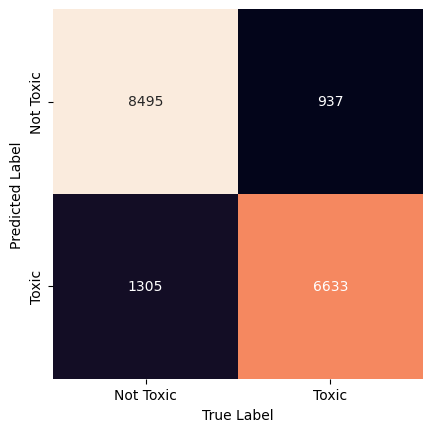

In [61]:
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

metrics.confusion_matrix(y_test, y_pred_class)

In [62]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      9800
           1       0.84      0.88      0.86      7570

    accuracy                           0.87     17370
   macro avg       0.87      0.87      0.87     17370
weighted avg       0.87      0.87      0.87     17370



In [63]:
raw = mnb.predict_proba(X_test_dtm)
raw

array([[7.55255859e-03, 9.92447441e-01],
       [1.15466699e-06, 9.99998845e-01],
       [4.16633513e-10, 1.00000000e+00],
       ...,
       [8.71676839e-02, 9.12832316e-01],
       [1.00000000e+00, 2.77420961e-11],
       [9.93314764e-01, 6.68523605e-03]])

In [64]:
# Show the predicted probabilities for the X_test_dtm (non-toxic class).

y_pred_prob_non_toxic_class = mnb.predict_proba(X_test_dtm)[:, 0]
y_pred_prob_non_toxic_class

array([7.55255859e-03, 1.15466699e-06, 4.16633513e-10, ...,
       8.71676839e-02, 1.00000000e+00, 9.93314764e-01])

In [65]:
# Show the predicted probabilities for the X_test_dtm (toxic class).

y_pred_prob_toxic_class = mnb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob_toxic_class

array([9.92447441e-01, 9.99998845e-01, 1.00000000e+00, ...,
       9.12832316e-01, 2.77420961e-11, 6.68523605e-03])

In [66]:
# Build a data frame with the input text, actual class, predicted class, and the predicted probabilities.

test_results_df = pd.DataFrame({'text': X_test, 'actual': y_test, 'predicted': y_pred_class, 'prob_non_toxic': y_pred_prob_non_toxic_class, 'prob_toxic': y_pred_prob_toxic_class})

# Reset the index.
test_results_df.reset_index(drop=True, inplace=True)

test_results_df

,text,actual,predicted,prob_non_toxic,prob_toxic
0,Di ako makapaniwala na pangalawa si Mar Roxas ...,1,1,7.552559e-03,9.924474e-01
1,A lot of you niggas turned these bitches into ...,1,1,1.154667e-06,9.999988e-01
2,RT @ZitlalyL: @Vic_Manzan0 just like you&#1280...,1,1,4.166335e-10,1.000000e+00
3,our playground for the morning. big bear tri ...,0,0,9.396200e-01,6.038000e-02
4,"""@ellisluciano: Binay as President #ShortHorro...",1,0,7.096837e-01,2.903163e-01
...,...,...,...,...,...
17365,Mad respect to Affleck for refusing to wear a ...,0,0,9.530769e-01,4.692311e-02
17366,RT @TAXSTONE: If YA bitch ex is a nigga u thin...,1,1,5.077755e-13,1.000000e+00
17367,@imcessfederico trillion yan ! Wala eh... Only...,0,1,8.716768e-02,9.128323e-01
17368,fathersdaymessage #fathers #day #message buy...,0,0,1.000000e+00,2.774210e-11


# 5 | Using Other AI Model (for comparison)

In [67]:
df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
69475,when baylor wins im talking so much trash,0
69476,who's downie like a brownie 4 brunch? Need mim...,0
69477,yea so about @N_tel 's new friend.. all my fri...,0
69478,"you know what they say, the early bird gets th...",0


## 5.1 | K-Means using 2 clusters.

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_train_dtm)
kmeans.cluster_centers_.shape

(2, 68698)

In [69]:
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask], keepdims=True)[0]

### Check for accuracy.

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, labels)

0.6751871042026483

Text(113.9222222222222, 0.5, 'Predicted label')

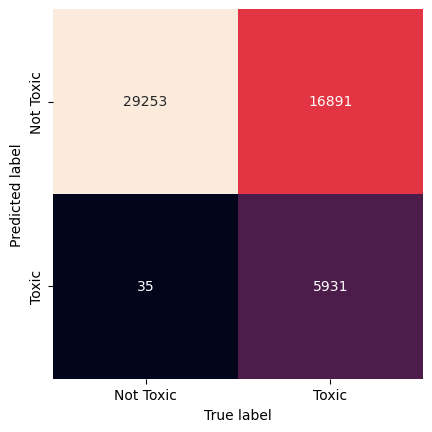

In [71]:
mat = confusion_matrix(y_train, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
             xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True label')
plt.ylabel('Predicted label')

## 5.2 | K-Means using 2 clusters with t-SNE.

In [72]:
from sklearn.manifold import TSNE

# Using t-SNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=69)
projection = tsne.fit_transform(X_train_dtm)

# Compute the clusters
kmeans = KMeans(n_clusters=2, n_init=10, random_state=69)
clusters = kmeans.fit_predict(projection)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask], keepdims=True)[0]

### Check for accuracy.

In [73]:
accuracy_score(y_train, labels)

0.7403185568988678

Text(113.9222222222222, 0.5, 'Predicted label')

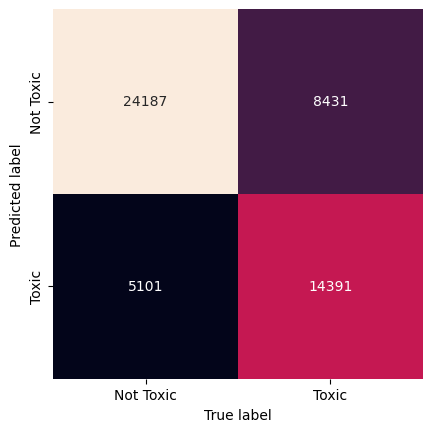

In [74]:
mat = confusion_matrix(y_train, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
             xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True label')
plt.ylabel('Predicted label')

There is a significant increase in accuracy rate when using t-SNE. Moving forward, we will use it to determine the best cluster size.

## 5.3 | Try 1-10 clusters while using t-SNE.

In [ ]:
kmeans = []
accuracy_scores = []
inertias = []

for i in range(1, 11):
    # Project the data: this step will take several seconds
    temp_tsne = TSNE(n_components=2, init='random', random_state=69)
    temp_projection = temp_tsne.fit_transform(X_train_dtm)

    # Compute the clusters
    temp_kmeans = KMeans(n_clusters=i, n_init=10, random_state=69)
    temp_clusters = temp_kmeans.fit_predict(temp_projection)
    kmeans.append(temp_kmeans)

    # Permute the labels
    temp_labels = np.zeros_like(temp_clusters)
    for j in range(2):
        mask = (temp_clusters == j)
        temp_labels[mask] = mode(y_train[mask], keepdims=True)[0]

    # Compute the accuracy
    temp_accuracy_score = accuracy_score(y_train, temp_labels)
    accuracy_scores.append(temp_accuracy_score)

    # Get the inertia
    temp_inertia = temp_kmeans.inertia_
    inertias.append(temp_inertia)


c:\Users\floss\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\floss\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


### Determine the best cluster size.

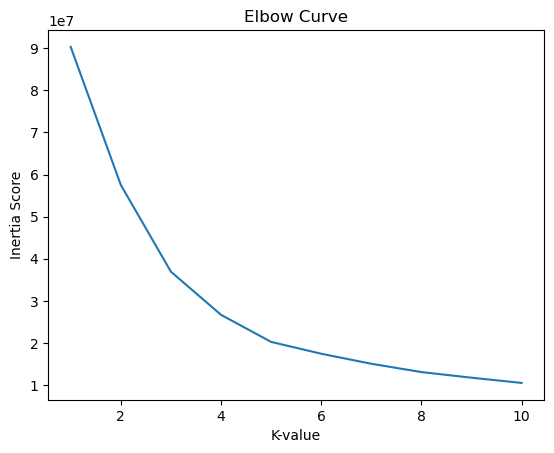

In [ ]:
# Display the Elbow Curve graph.

plt.plot(range(1, 11), inertias)
plt.xlabel('K-value')
plt.ylabel('Inertia Score')
plt.title('Elbow Curve')
plt.show()

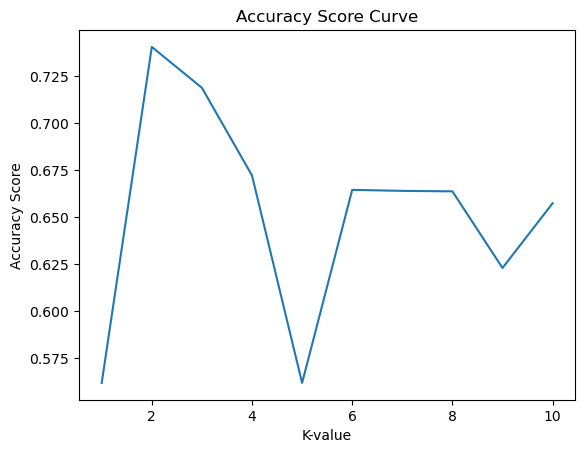

In [ ]:
# Display the Accuracy Score Curve graph.

plt.plot(range(1, 11), accuracy_scores)
plt.xlabel('K-value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Curve')
plt.show()

In [ ]:
# Construct a data frame with the K-value and the corresponding accuracy score.

kmeans_accuracy_df = pd.DataFrame({'k': range(1, 11), 'accuracy_score': accuracy_scores})
kmeans_accuracy_df

,k,accuracy_score
0,1,0.562042
1,2,0.740319
2,3,0.718634
3,4,0.672117
4,5,0.562042
5,6,0.664479
6,7,0.663942
7,8,0.663692
8,9,0.623028
9,10,0.657379


The best cluster size is **n_clusters=2** with an accuracy of 74.03%.

# [ RESULTS ]

# 6 | Results and Discussions

## 6.1 | Existing Solutions for the 'Toxic Speech Classifier' problem.

The [**Perspective API**](https://perspectiveapi.com/) exposed by [Firebase Extensions](https://extensions.dev/extensions/jigsaw/firestore-perspective-toxicity) (BaaS - Backend as a Service) is a commercialize toxic speech classifier produced by the [Jigsaw](https://jigsaw.google.com/) company.

![Perspective API in the Firebase Extensions Hub](https://github.com/Qubits-01/toxic-speech-classifier/blob/main/assets/sample1_perspective_api.png?raw=true)

The downside is that this toxic classifier only supports **few** languages (e.g., it does not support the Filipino language). That is why, we decided to make our own classifier (this project) that supports Filipino and Taglish (aside from English) so that we can use it locally here in our country - Philippines.

Many other toxic classfiers, hate speech classifiers, profanity classifiers, and the like exist in the ever booming market of SaaS and AIaaS digital products. But why they do all have in common is that they don't support the Filipino language (and its dialects - Ilokano, Bicolano, 'TagLish', etc.).

## 6.2 | Monomial Naive Bayes Classifier

MNB accuracy rate *before* hypertuning the parameters: **~86.379%**

![MNB without optimized parameters - Confusion Matrix](https://github.com/Qubits-01/toxic-speech-classifier/blob/main/assets/MNB_without_optimized_params.png)
![MNB without optimized parameters - Classification Report](https://github.com/Qubits-01/toxic-speech-classifier/blob/main/assets/MNB_without_optimized_params_classification_report.png?raw=true)


MNB accuracy rate *after* hypertuning the parameters: **~87.093%**

![MNB with optimized parameters - Confusion Matrix](https://github.com/Qubits-01/toxic-speech-classifier/blob/main/assets/MNB_with_optimized_params.png)
![MNB without optimized parameters - Classification Report](https://github.com/Qubits-01/toxic-speech-classifier/blob/main/assets/MNB_with_optimized_params_classification_report.png?raw=true)

There is an improvement of **0.714%**.

Looking at the confusion matrices of both models, we see that both the True Negatives and True Positives have a higher value while the False Negatives and False Positives have a lower value in the confusion matrix of the MNB with optimized parameters. This is the cause of the increase in accuracy rate in the optimized MNB model. Looking at the classification report, we also see that all the values regarding precision, recall, and f1-score have a higher value in the optimized MNB model. This means that hypertuning the model was able to greatly aid in accuracy.

For the remaining parts of the paper, the MNB model will refer to the optimized MNB model since it has a higher accuracy score.

## 6.3 | KMeans Classifier

KMeans accuracy rate *before* using tSNE (n_clusters=2): **~67.519%**

![MNB without tSNE](https://github.com/Qubits-01/toxic-speech-classifier/blob/main/assets/KMeans_without_tSNE.png?raw=true)


KMeans accuracy rate *after* use tSNE (n_clusters=2): **~74.032%**

![MNB with tSNE](https://github.com/Qubits-01/toxic-speech-classifier/blob/main/assets/KMeans_with_tSNE.png?raw=true)

There is an improvement of **6.513%**.

From the confusion matrices of both K-means models, we see that the model without using tSNE had a higher value for True Negatives, classifying non-toxic tweets as non-toxic, and a lower value for False Positives, classifying non-toxic tweets as toxic, when compare to the K-means model that uses tSNE. This shows that the model without using tSNE is more efficient in classifying tweets that are non-toxic rather than identifying tweets that are toxic.

This model is a highly conservative model that has strict implementations on classifying a tweet as toxic. This is proven by the high number of False Negatives as seen in the confusion matrix. Though the high number of True Negatives is appealing, the aim of the project is to identify toxic tweets rather than non-toxic tweets, therefore the model is not ideal for the objectives of the project.

Looking at the confusion matrix of the K-means model where tSNE was applied, we see that the model has a lower rate of classifying non-toxic tweets correctly, in exchange for correctly classifying toxic tweets. This model is more ideal towards the project's objectives and has a higher accuracy rate. Therefore, the tSNE K-means model is better, with regards to the scope of the project.

Moving forward, the K-means model will refer to the K-means model where tSNE was applied.

We used a k-mean value of **2** since it gives the best accuracy score (as can be seen in the **Elbow Curve** and **Accuracy Score Curve**). This makes sense since the dataset is primarily separated by **two distinct** classes afterall (i.e., non-toxic and toxic class).

![Elbow Curve](https://github.com/Qubits-01/toxic-speech-classifier/blob/main/assets/KMeans_elbow_curve.png?raw=true)
![Accuraccy Score Curve](https://github.com/Qubits-01/toxic-speech-classifier/blob/main/assets/KMeans_accurarcy_score_curve.png?raw=true)

## 6.4 | Multinomial Naive Bayes vs K-means Model

(Add some discussion here)

## 6.5 | Conclusion

(Add some discussion here)

# 7 | Some Results Showcase

In [75]:
# Show the correctly classified text.

test_results_df[(test_results_df['actual'] == test_results_df['predicted']) & ((test_results_df['prob_toxic'] > 0.5) | (test_results_df['prob_non_toxic'] > 0.5))]

,text,actual,predicted,prob_non_toxic,prob_toxic
0,Di ako makapaniwala na pangalawa si Mar Roxas ...,1,1,7.552559e-03,9.924474e-01
1,A lot of you niggas turned these bitches into ...,1,1,1.154667e-06,9.999988e-01
2,RT @ZitlalyL: @Vic_Manzan0 just like you&#1280...,1,1,4.166335e-10,1.000000e+00
3,our playground for the morning. big bear tri ...,0,0,9.396200e-01,6.038000e-02
5,#nazi #swastika #ebay! #trump #donaldtrump #re...,1,1,5.883882e-02,9.411612e-01
...,...,...,...,...,...
17364,RT @ImNeverChillin: Niggas drop outta high sch...,1,1,3.443211e-11,1.000000e+00
17365,Mad respect to Affleck for refusing to wear a ...,0,0,9.530769e-01,4.692311e-02
17366,RT @TAXSTONE: If YA bitch ex is a nigga u thin...,1,1,5.077755e-13,1.000000e+00
17368,fathersdaymessage #fathers #day #message buy...,0,0,1.000000e+00,2.774210e-11


In [76]:
# Show the misclassified text.

test_results_df[(test_results_df['actual'] != test_results_df['predicted'])]

,text,actual,predicted,prob_non_toxic,prob_toxic
4,"""@ellisluciano: Binay as President #ShortHorro...",1,0,0.709684,0.290316
31,Anyone want to share their thoughts on their m...,1,0,0.672222,0.327778
32,"""..a broader phenomenon: the reemergence of #r...",1,0,0.975314,0.024686
35,"Nakakabeast mode naman. Di ka pa nga botante, ...",1,0,0.639222,0.360778
45,joshwin is always like this! ðð what's w...,0,1,0.283788,0.716212
...,...,...,...,...,...
17337,expes explain the best way to deal with frien...,1,0,0.999352,0.000648
17338,"this! #cambersands deaths blamed on victims' ""...",1,0,0.957978,0.042022
17339,RT @Elisaa_Martinez: Happy birthday cotton pic...,0,1,0.001537,0.998463
17343,Hindi ko maintindihan bat nasa fifth spot si S...,1,0,0.906055,0.093945


In [77]:
# Show some toxic text that were correctly classified.

test_results_df[(test_results_df['actual'] == test_results_df['predicted']) & (test_results_df['predicted'] == 1) &(test_results_df['prob_toxic'] > 0.95)].sort_values(by='prob_toxic').head(20)

,text,actual,predicted,prob_non_toxic,prob_toxic
13532,Stern fixed the image of the league.. NBA play...,1,1,0.049795,0.950205
9314,@nCrusade @GodManiac_ come wage with us fag,1,1,0.049670,0.950330
9106,shet ibabalik yung martial law at take note ma...,1,1,0.049488,0.950512
12506,"@cnnphilippines Good job, Mrs. Poe! But Dutert...",1,1,0.049032,0.950968
8479,@MoenKiana I am working fag,1,1,0.049030,0.950970
15432,Ugh! Another annoying from VP Binay. ??,1,1,0.048755,0.951245
2352,magsama sila ni binay. Mukhang pera.,1,1,0.048528,0.951472
6999,Ate M: Pinatunayan ni nognog na may mas maitim...,1,1,0.048387,0.951613
10094,Wow my dad just racked me what a fag,1,1,0.048249,0.951751
9587,RT @BeYouTiful_Pris: Recognize that I'm a star...,1,1,0.048197,0.951803


In [78]:
#  Show some non-toxic text that were correctly classified.

test_results_df[(test_results_df['actual'] == test_results_df['predicted']) & (test_results_df['predicted'] == 0) &(test_results_df['prob_non_toxic'] > 0.95)].sort_values(by='prob_non_toxic').head(20)


,text,actual,predicted,prob_non_toxic,prob_toxic
3870,this time they did it #belgium ððð,0,0,0.950027,0.049973
6678,@user the only person behaving as an idiot wo...,0,0,0.950081,0.049919
11938,#RoxasRobredo,0,0,0.950092,0.049908
8827,@GabeJGonzalez @RPopBox and a prime Leija woul...,0,0,0.950168,0.049832
9335,5 proven #habits that people have,0,0,0.950203,0.049797
6906,"Great picture, could stand for Binay, Marcos, ...",0,0,0.950307,0.049693
3763,i was so pumped cause bones will be having fou...,0,0,0.950412,0.049588
13686,can you guess what i did friday?ðð½ #barn...,0,0,0.950553,0.049447
14210,"smiling, cheering, crying ... #americanninjawa...",0,0,0.950559,0.049441
13800,For Mar Roxas ? think 100x Duterte Solid to! h...,0,0,0.950687,0.049313


# 8 | For Bonus Points (AIaaS - AI as a service)

In [79]:
# Save the fitted Monomial Naive Bayes model locally.
# This will be used for the FastAPI backend.

import joblib

joblib.dump(mnb, './backend/mnb_model.joblib')

['./backend/mnb_model.joblib']

In [80]:
# Save the X_train data frame locally.
# This will be used for the FastAPI backend.
# (i.e., to fit the CountVectorizer instance there).

X_train.to_csv('./backend/X_train.csv', index=False)

In [81]:
# Save the custom stopwords list to a text file locally.
# This will be used for the FastAPI backend.

with open('./backend/custom_stopwords.txt', 'w') as file:
    for word in custom_stop_words:
        file.write(word + '\n')

# Close the file.
file.close()